In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
import os
print(os.listdir('/Users/mr_lurie/dynastytrial'))

['.DS_Store', 'Draft_Rounds.csv', 'Dynasty_Data.csv', 'FF_Data.csv', 'FF_Data_Extended.csv', 'sleeper1.csv', 'testfile.csv']


In [3]:
# the "encoding = "ISO-8859-1").fillna(0)" part after the csv path takes all empty data fields
# and sets them to zero. That way , missing values won't return errors. Before implementing
# this code for my data frame, all of the missing values for the forty times would appear as 
# "nan" which is not good for your data analysis. 
dyno = pd.read_csv('/Users/mr_lurie/dynastytrial/FF_Data_Extended.csv', encoding = "ISO-8859-1").fillna(0)
dyno['PPG'] = dyno['Stats'] / dyno['Games']

In [4]:
dyno.head(30)

,Player,Value,Stats,Games,Age,Draft_Year,Position,Round,Pick,Forty,Salary,Snaps,Targets,YAC,PPG
0,Christian McCaffrey,10232,415,16,24.0,2017.0,RB,1.0,8.0,4.480,4.31,0.9130,124.0,845.0,25.937500
1,Saquon Barkley,9994,219,13,23.3,2018.0,RB,1.0,2.0,4.400,7.80,0.8296,121.0,768.0,16.846154
2,Michael Thomas,9808,299,16,27.2,2016.0,WR,2.0,16.0,4.595,19.25,0.8839,147.0,536.0,18.687500
3,Ezekiel Elliott,9292,285,16,24.9,2016.0,RB,1.0,4.0,4.470,15.00,0.8271,95.0,576.0,17.812500
4,Alvin Kamara,9184,204,14,23.9,2017.0,RB,3.0,3.0,4.530,0.96,0.6261,105.0,642.0,14.571429
5,Dalvin Cook,8866,262,14,24.8,2017.0,RB,2.0,9.0,4.525,1.59,0.4672,49.0,384.0,18.714286
6,DeAndre Hopkins,8721,218,15,28.0,2013.0,WR,1.0,27.0,4.595,16.20,0.9909,163.0,415.0,14.533333
7,Davante Adams,8619,171,12,27.4,2014.0,WR,2.0,21.0,4.560,14.50,0.8873,169.0,472.0,14.250000
8,Tyreek Hill,8599,161,12,26.2,2016.0,WR,5.0,28.0,4.340,18.00,0.8660,137.0,570.0,13.416667
9,Chris Godwin,8262,242,14,24.3,2017.0,WR,3.0,20.0,4.420,0.82,0.6430,95.0,257.0,17.285714


In [5]:
TEs = dyno[dyno.Position == 'TE']
RBs = dyno[dyno.Position == 'RB']
WRs = dyno[dyno.Position == 'WR']
QBs = dyno[dyno.Position == 'QB']

In [6]:
what_round = TEs.groupby("Round").size()
what_round
# Need to fix the snap column. does not look accurate. also need to add in missing forty times

Round
0.0    2
1.0    8
2.0    8
3.0    6
4.0    4
5.0    1
6.0    1
dtype: int64

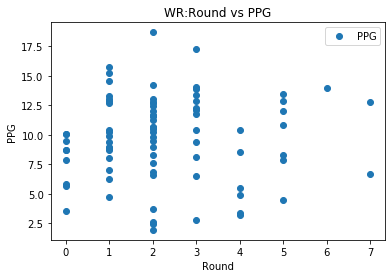

In [7]:
WRs.plot(x='Round', y='PPG', style='o')
plt.title('WR:Round vs PPG')
plt.xlabel('Round')
plt.ylabel('PPG')
plt.show()

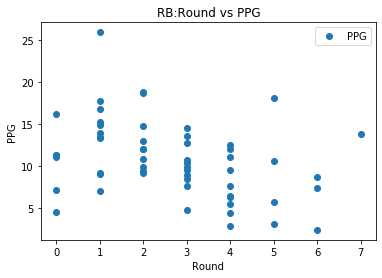

In [8]:
RBs.plot(x='Round', y='PPG', style='o')
plt.title('RB:Round vs PPG')
plt.xlabel('Round')
plt.ylabel('PPG')
plt.show()

In [24]:
# now I am going to use the pearson correlation coefficient . this is calculated by dividing 
# the covariance of the variables by their standard deviation . the values produced range 
# from -1 to 1. 1 is perfect positive linear correlation, 0 is no linear correlation, and -1 
# a perfect negative linear correlation
dyno_pos = dyno[dyno['Position'] == 'WR']
dyno_pos.corr()

,Value,Stats,Games,Age,Draft_Year,Round,Pick,Forty,Salary,Snaps,Targets,YAC,PPG
Value,1.000000,0.673463,0.159915,-0.031039,0.088501,-0.092089,0.143001,0.103373,0.348081,0.311565,0.454906,0.491303,0.675984
Stats,0.673463,1.000000,0.536076,0.267766,0.212048,-0.012081,-0.004014,0.210136,0.359086,0.374002,0.408214,0.373353,0.844867
Games,0.159915,0.536076,1.000000,0.210391,0.418551,-0.029112,-0.040649,-0.040028,-0.064696,0.014544,-0.076294,-0.073870,-0.010245
Age,-0.031039,0.267766,0.210391,1.000000,0.683322,-0.163454,-0.163626,0.293150,0.508257,0.281121,0.245997,0.191213,0.121991
Draft_Year,0.088501,0.212048,0.418551,0.683322,1.000000,-0.255519,-0.095823,-0.070594,0.101661,-0.141815,-0.219078,-0.185718,-0.136776
Round,-0.092089,-0.012081,-0.029112,-0.163454,-0.255519,1.000000,0.393857,0.079740,-0.116973,0.023514,0.021683,0.076108,0.033529
Pick,0.143001,-0.004014,-0.040649,-0.163626,-0.095823,0.393857,1.000000,-0.037594,-0.069523,-0.089507,-0.014096,0.038297,0.020986
Forty,0.103373,0.210136,-0.040028,0.293150,-0.070594,0.079740,-0.037594,1.000000,0.348468,0.643908,0.567294,0.536293,0.303484
Salary,0.348081,0.359086,-0.064696,0.508257,0.101661,-0.116973,-0.069523,0.348468,1.000000,0.575111,0.676657,0.567777,0.467496
Snaps,0.311565,0.374002,0.014544,0.281121,-0.141815,0.023514,-0.089507,0.643908,0.575111,1.000000,0.903364,0.789704,0.470583


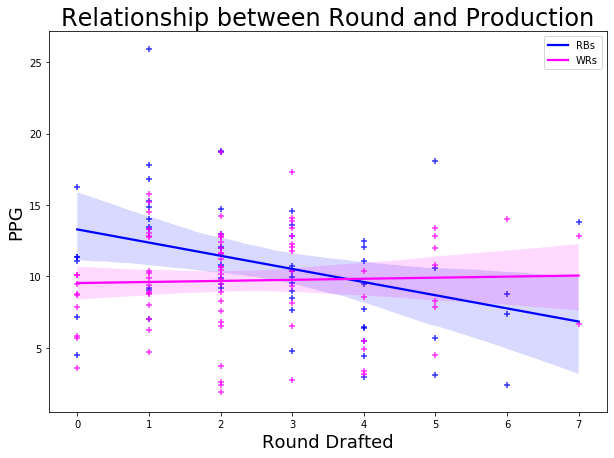

In [13]:
# Playing around with the python library 'seaborn'

import seaborn as sns

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=RBs.Round, y=RBs.PPG, color='blue', marker='+')
sns.regplot(x=WRs.Round, y=WRs.PPG, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['RBs', 'WRs'])
plt.title('Relationship between Round and Production', size=24)
plt.xlabel('Round Drafted', size=18)
plt.ylabel('PPG', size=18);

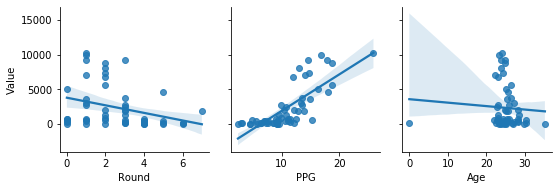

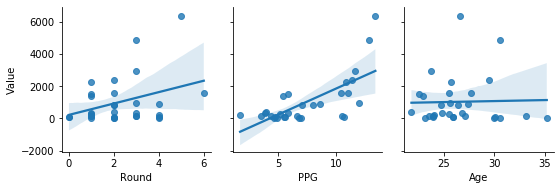

In [35]:
sns.pairplot(RBs, x_vars=['Round', 'PPG', 'Age'], y_vars='Value', kind='reg')
sns.pairplot(TEs, x_vars=['Round', 'PPG', 'Age'], y_vars='Value', kind='reg')

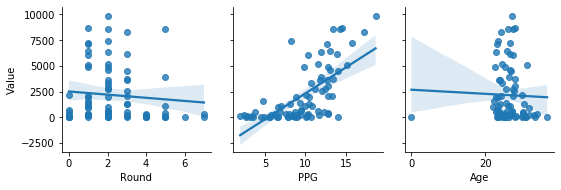

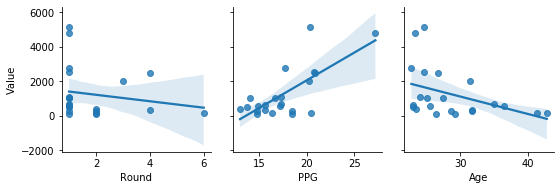

In [23]:
sns.pairplot(WRs, x_vars=['Round', 'PPG', 'Age'], y_vars='Value', kind='reg')
sns.pairplot(QBs, x_vars=['Round', 'PPG', 'Age'], y_vars='Value', kind='reg')

In [33]:
# Exploratory Data Analysis on this data:

# Descriptive statistics RBs
statistics_RBs = dyno[dyno['Position'] == 'RB'].describe()
statistics_RBs.rename(columns=lambda x: x + '_RBs', inplace=True)

# Descriptive statistics WRs
statistics_WRs = dyno[dyno['Position'] == 'WR'].describe()
statistics_WRs.rename(columns=lambda x: x + '_WRs', inplace=True)

# Dataframe that contains statistics for both RBs and WRs
statistics = pd.concat([statistics_RBs, statistics_WRs], axis=1)
statistics

,Value_RBs,Stats_RBs,Games_RBs,Age_RBs,Draft_Year_RBs,Round_RBs,Pick_RBs,Forty_RBs,Salary_RBs,Snaps_RBs,...,Age_WRs,Draft_Year_WRs,Round_WRs,Pick_WRs,Forty_WRs,Salary_WRs,Snaps_WRs,Targets_WRs,YAC_WRs,PPG_WRs
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,82.000000
mean,2341.196429,152.089286,13.839286,24.896429,1980.642857,2.660714,15.910714,3.709643,2.708393,0.331802,...,26.143373,1991.421687,2.277108,16.301205,3.458193,5.970602,0.503260,71.216867,211.120482,9.706373
std,3082.693235,75.697791,2.606124,4.169149,269.495922,1.760958,12.324811,1.746416,3.603260,0.254404,...,4.191868,221.273758,1.617837,11.120992,1.897867,5.995219,0.322948,51.453993,169.683162,3.623303
min,23.000000,29.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.937500
25%,169.250000,90.750000,13.000000,23.575000,2015.000000,1.000000,5.500000,4.427500,0.737500,0.084000,...,24.000000,2014.000000,1.000000,6.000000,4.310000,1.005000,0.261950,32.500000,67.500000,7.661538
50%,695.500000,142.500000,15.000000,24.850000,2017.000000,3.000000,12.500000,4.500000,1.120000,0.347050,...,25.900000,2016.000000,2.000000,16.000000,4.430000,2.800000,0.575400,68.000000,205.000000,10.083333
75%,3192.500000,194.500000,16.000000,26.325000,2018.000000,4.000000,26.250000,4.550000,2.717500,0.481800,...,27.650000,2018.000000,3.000000,27.000000,4.542500,10.250000,0.774650,108.000000,352.500000,12.659375
max,10232.000000,415.000000,16.000000,35.200000,2019.000000,7.000000,42.000000,4.660000,15.000000,0.913000,...,36.700000,2019.000000,7.000000,37.000000,4.715000,22.000000,0.990900,170.000000,687.000000,18.687500


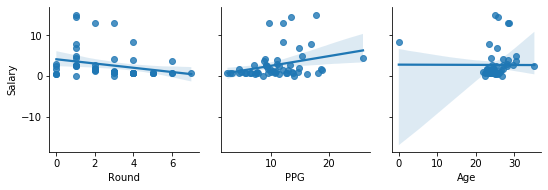

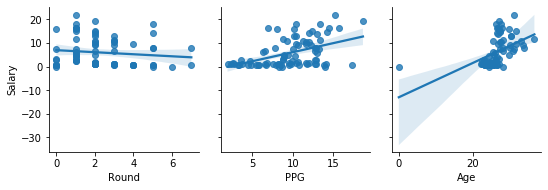

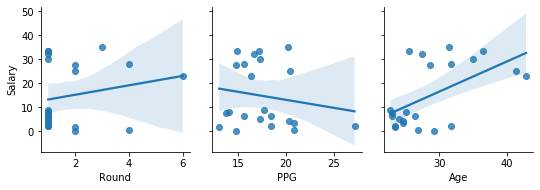

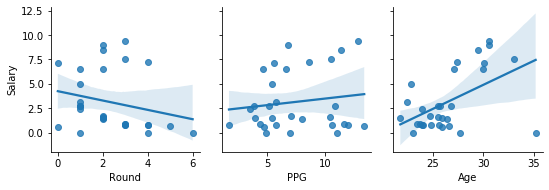

In [37]:
sns.pairplot(RBs, x_vars=['Round', 'PPG', 'Age'], y_vars='Salary', kind='reg')
sns.pairplot(WRs, x_vars=['Round', 'PPG', 'Age'], y_vars='Salary', kind='reg')
sns.pairplot(QBs, x_vars=['Round', 'PPG', 'Age'], y_vars='Salary', kind='reg')
sns.pairplot(TEs, x_vars=['Round', 'PPG', 'Age'], y_vars='Salary', kind='reg')